In [138]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy

In [139]:
add_spaces=0 #va a contar los guiones que aparecen en el genoma de referencia, al hacer el alineado
temp=0

#Lee el archivo FASTA y manda los nombres y secuencias a un diccionario
with open('8_de_cada_una.fasta') as f:
  sequences = {} #inicializa el diccionario
  name = None
  for line in f:
    line = line.strip()
    if line.startswith('>'):  
      name = line[1:]
      sequences[name] = ''
    else:
      sequences[name] += line
      if temp == 0:
        #Encuentra la cantidad de espacios iniciales "-" para saber cuántas posiciones están alineadas antes de que empiece la secuencia real.
        while line[add_spaces]=='-': add_spaces+=1
        temp = 1

print(add_spaces)

25


In [140]:
#Imprime las secuencias encontradas.
print("Secuencias:")
for name in sequences.values():
  print(name)

Secuencias:
-------------------------AACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAACTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTTTTGCAGCCGATCATCAGCACATCTAGGTTTTGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTCCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTACGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGGCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGATGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTCGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCTTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTAGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTGTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGGCCCTGATGGCTACCCTCTTGAGTGCATTAAAGACCTTCTAGCACGTGCTGGTAAAGCTTCATGCACTTTGTCCGAACAACTGGACTTTATTGACACTAAGAGGGGTGTATACTGCTGCCGTGAACATGAGCATGAAATTGCTTGGTAC

In [141]:
#Imprime los nombres de las secuencias encontradas.
print("Secuencias:")
i = 0
for name in sequences.keys():
  print(str(i)+' '+name)
  i=i+1
#POR QUÉ NO DETECTA LA OTRA DE BOTSWANA?

Secuencias:
0 hCoV-19/India/TN-ICMR-INSACOG-SPHL1343/2021|EPI_ISL_15003313|2021-11-19
1 hCoV-19/India/GA-NCCS-601716226/2021|EPI_ISL_15157215|2021-12-13
2 hCoV-19/India/GA-NCCS-586999988/2021|EPI_ISL_15157245|2021-11-29
3 hCoV-19/India/AS-NEIST-INSACOG-R7-CIDIN0455/2021|EPI_ISL_14978714|2021-08-25
4 hCoV-19/India/AS-NEIST-INSACOG-R5-CIDIN0323/2021|EPI_ISL_14953142|2021-07-21
5 hCoV-19/India/OR-ILSGS17529/2022|EPI_ISL_14749025|2022-02-02
6 hCoV-19/India/TN-INSACOG-CBR-S-7828/2021|EPI_ISL_14678444|2021-10-27
7 hCoV-19/India/GA-NCCS-3055200213398/2021|EPI_ISL_15162750|2021-12-04
8 hCoV-19/Botswana/R209B69_BHP_AAC31884/2021|EPI_ISL_18210988|2021-12-06
9 hCoV-19/Botswana/R209B60_BHP_AAC45786/2021|EPI_ISL_18210983|2021-12-21
10 hCoV-19/Botswana/R209B55_BHP_859936/2021|EPI_ISL_18210979|2021-12-04
11 hCoV-19/France/HDF-HMN-22052230219/2022|EPI_ISL_13371056|2022-03-07
12 hCoV-19/France/BFC-LBZCentre-JA2204040093/2022|EPI_ISL_13524814|2022-04-04
13 hCoV-19/France/un-IHU-063862/2022|EPI_ISL_17750

In [142]:
ranges = [
  (266,13468),
  (13468,21555),
  (21563,25384),
  (25393,26220),
  (26245,26472),
  (26523,27191),
  (27202,27387),
  (27394,27759),
  (27756,27887),
  (27894,28259),
  (28284,28577),
  (28274,29533)
]
matriz_vector = []


In [143]:
#Actualiza los rangos
updated_ranges = []
for start, end in ranges:
    updated_ranges.append((start + add_spaces, end + add_spaces))
updated_ranges

[(291, 13493),
 (13493, 21580),
 (21588, 25409),
 (25418, 26245),
 (26270, 26497),
 (26548, 27216),
 (27227, 27412),
 (27419, 27784),
 (27781, 27912),
 (27919, 28284),
 (28309, 28602),
 (28299, 29558)]

In [144]:
#Actualiza los rangos
updated_ranges = []
for start, end in ranges:
    updated_ranges.append((start + add_spaces, end + add_spaces))

for start, end in updated_ranges:

  print(f"\nRango: {start}-{end}")
  
  num_seqs = len(sequences)
  dist_matrix = np.zeros((num_seqs, num_seqs))

  for i in range(num_seqs):
    for j in range(i+1, num_seqs):
      # Usamos list(sequences.items()) para convertir el diccionario a una lista de tuplas (nombre, secuencia)
      name1, seq1 = list(sequences.items())[i]
      name2, seq2 = list(sequences.items())[j]

      diff_count = 0
      for k in range(start, end):
        # Para cada par de secuencias, cuenta el número de diferencias (mutaciones) entre ellas en los rangos especificados.
        # if seq1[k] != seq2[k] and seq2[k] != '-':
        if seq1[k] != seq2[k] and seq1[k]!= 'N' and seq2[k]!= 'N':
          diff_count += 1
      
      #Guarda las distancias en la matriz de distancia simétrica
      dist_matrix[i,j] = diff_count
      dist_matrix[j,i] = diff_count

  print(dist_matrix)
  matriz_vector.append(dist_matrix)


Rango: 291-13493
[[ 0. 21. 19. 25.  9. 32. 17. 11. 21. 21. 21.  9. 12. 10. 10. 10.  9. 11.]
 [21.  0. 16. 31. 18. 39. 25. 14. 29. 29. 29. 18. 21. 19. 19. 18. 19. 19.]
 [19. 16.  0. 27. 16. 32. 23. 13. 25. 25. 25. 15. 17. 16. 16. 16. 17. 17.]
 [25. 31. 27.  0. 19. 43. 28. 22. 18. 18. 18. 20. 24. 21. 21. 21. 20. 22.]
 [ 9. 18. 16. 19.  0. 27. 11.  6. 16. 16. 16.  4.  7.  5.  5.  5.  4.  6.]
 [32. 39. 32. 43. 27.  0. 35. 29. 39. 39. 39. 27. 29. 28. 26. 28. 24. 29.]
 [17. 25. 23. 28. 11. 35.  0. 14. 22. 22. 22. 12. 16. 13. 12. 13. 12. 14.]
 [11. 14. 13. 22.  6. 29. 14.  0. 18. 18. 18.  6. 10.  7.  7.  7.  7.  8.]
 [21. 29. 25. 18. 16. 39. 22. 18.  0.  0.  0. 16. 20. 17. 17. 17. 16. 18.]
 [21. 29. 25. 18. 16. 39. 22. 18.  0.  0.  0. 16. 20. 17. 17. 17. 16. 18.]
 [21. 29. 25. 18. 16. 39. 22. 18.  0.  0.  0. 16. 20. 17. 17. 17. 16. 18.]
 [ 9. 18. 15. 20.  4. 27. 12.  6. 16. 16. 16.  0.  4.  1.  1.  1.  2.  2.]
 [12. 21. 17. 24.  7. 29. 16. 10. 20. 20. 20.  4.  0.  5.  5.  5.  6.  6.]
 [10. 1

<AxesSubplot:>

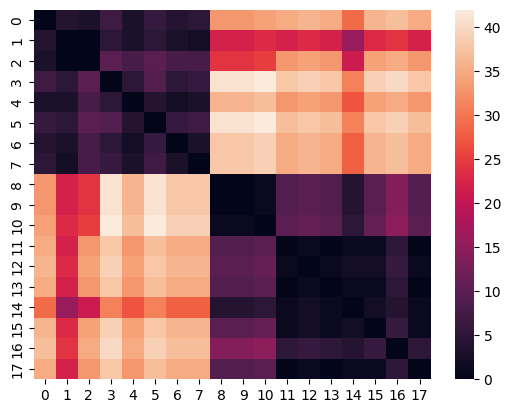

In [145]:
import seaborn as sns
sns.heatmap(matriz_vector[2],annot=False)

In [152]:
print(matriz_vector[2])

[[ 0.  4.  3.  7.  3.  6.  4.  5. 33. 33. 34. 35. 36. 35. 29. 36. 37. 35.]
 [ 4.  0.  0.  5.  3.  5.  3.  2. 22. 22. 23. 22. 23. 22. 16. 23. 24. 22.]
 [ 3.  0.  0. 10.  8. 10.  8.  8. 24. 24. 25. 33. 34. 33. 21. 34. 35. 33.]
 [ 7.  5. 10.  0.  5.  9.  5.  6. 41. 41. 42. 38. 39. 38. 31. 39. 40. 38.]
 [ 3.  3.  8.  5.  0.  4.  2.  3. 36. 36. 37. 33. 34. 33. 27. 34. 35. 33.]
 [ 6.  5. 10.  9.  4.  0.  6.  7. 41. 41. 42. 37. 38. 37. 31. 38. 39. 37.]
 [ 4.  3.  8.  5.  2.  6.  0.  3. 38. 38. 39. 35. 36. 35. 28. 36. 37. 35.]
 [ 5.  2.  8.  6.  3.  7.  3.  0. 38. 38. 39. 35. 36. 35. 28. 36. 37. 35.]
 [33. 22. 24. 41. 36. 41. 38. 38.  0.  0.  1.  9. 10.  9.  4. 10. 14.  9.]
 [33. 22. 24. 41. 36. 41. 38. 38.  0.  0.  1.  9. 10.  9.  4. 10. 14.  9.]
 [34. 23. 25. 42. 37. 42. 39. 39.  1.  1.  0. 10. 11. 10.  5. 11. 15. 10.]
 [35. 22. 33. 38. 33. 37. 35. 35.  9.  9. 10.  0.  1.  0.  1.  1.  5.  0.]
 [36. 23. 34. 39. 34. 38. 36. 36. 10. 10. 11.  1.  0.  1.  2.  2.  6.  1.]
 [35. 22. 33. 38. 33. 37.

In [146]:
import argparse
import numpy as np
import gudhi
import matplotlib.pyplot as plot

In [147]:
max_edge_length = 360
max_dimension = 3
band = 0.0

print("#####################################################################")
print("RipsComplex creation from defined distance matrix G3")
   
rips_complex = gudhi.RipsComplex(
   distance_matrix=dist_matrix, max_edge_length=max_edge_length  
)

#####################################################################
RipsComplex creation from defined distance matrix G3


In [148]:
simplex_tree = rips_complex.create_simplex_tree(max_dimension=max_dimension)
   
message = "Number of simplices=" + repr(simplex_tree.num_simplices()) 
print(message)
  
diag = simplex_tree.persistence()

print("betti_numbers()=")
print(simplex_tree.betti_numbers())

Number of simplices=4047
betti_numbers()=
[1, 0, 0]


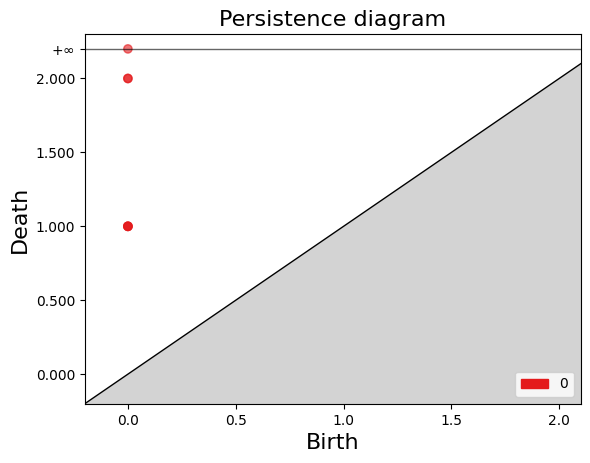

In [149]:
gudhi.plot_persistence_diagram(diag, band=band)
plot.show()

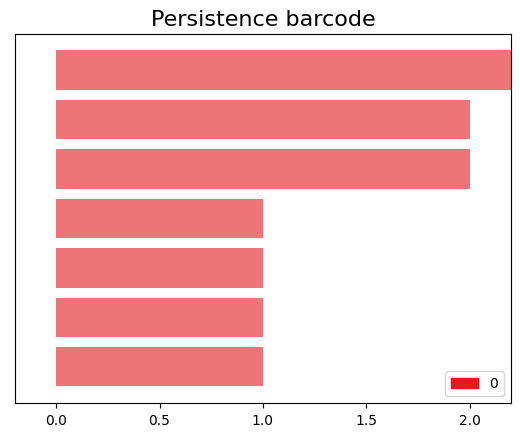

In [150]:
gudhi.plot_persistence_barcode(diag)
plot.show()